# Tally Data Processing
From: https://docs.openmc.org/en/stable/examples/pandas-dataframes.html

In [1]:
import openmc
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy

statepoints = glob.glob('statepoint.*.h5')
sp = openmc.StatePoint(statepoints[-1])

### Mesh Fission Rate Tally
Tally 'fission tally' estimates the fission rate in the 17*17 mesh.

In [2]:
tally = sp.get_tally(name='fission tally')
print(tally)

Tally
	ID             =	1
	Name           =	fission tally
	Filters        =	MeshFilter, EnergyFilter
	Nuclides       =	total
	Scores         =	['fission', 'nu-fission']
	Estimator      =	tracklength


Get the relative error for the thermal fission rates in 4 corner pins.

Actually, this is just a small example. We usually use tally.get_pandas_dataframe(), which is introduced below, instead of tally.get_values().

In [3]:
data = tally.get_values(
    scores=['fission'], 
    filters=[openmc.MeshFilter, openmc.EnergyFilter], 
    filter_bins=[((1, 1), (1, 17), (17, 1), (17, 17), (8, 8)), ((0., 0.625),)], 
    value='rel_err'
    )
print(data)

[[[0.14582479]]

 [[0.12757071]]

 [[0.48508738]]

 [[0.17412469]]

 [[0.10813189]]]


### Analyzing with Pandas
##### 1. Mesh Tally

In [4]:
df = tally.get_pandas_dataframe(nuclides=False)
pd.options.display.float_format = '{:.2e}'.format
df.head(20)

mesh 1       energy low [eV] energy high [eV]       score     mean  \
        x  y  z                                                         
0       1  1  1        0.00e+00         6.25e-01     fission 2.24e-04   
1       1  1  1        0.00e+00         6.25e-01  nu-fission 5.46e-04   
2       1  1  1        6.25e-01         2.00e+07     fission 8.11e-05   
3       1  1  1        6.25e-01         2.00e+07  nu-fission 2.13e-04   
4       2  1  1        0.00e+00         6.25e-01     fission 1.83e-04   
5       2  1  1        0.00e+00         6.25e-01  nu-fission 4.45e-04   
6       2  1  1        6.25e-01         2.00e+07     fission 8.77e-05   
7       2  1  1        6.25e-01         2.00e+07  nu-fission 2.30e-04   
8       3  1  1        0.00e+00         6.25e-01     fission 2.21e-04   
9       3  1  1        0.00e+00         6.25e-01  nu-fission 5.39e-04   
10      3  1  1        6.25e-01         2.00e+07     fission 8.51e-05   
11      3  1  1        6.25e-01         2.00e+07  nu-fission 2.26e-04   
12      4  1  1        0.00e+00         6.25e-01     fission 1.54e-04   
13      4  1  1        0.00e+00         6.25e-01  nu-fission 3.76e-04   
14      4  1  1        6.25e-01         2.00e+07     fission 8.39e-05   
15      4  1  1        6.25e-01         2.00e+07  nu-fission 2.22e-04   
16      5  1  1        0.00e+00         6.25e-01     fission 1.53e-04   
17      5  1  1        0.00e+00         6.25e-01  nu-fission 3.74e-04   
18      5  1  1        6.25e-01         2.00e+07     fission 8.70e-05   
19      5  1  1        6.25e-01         2.00e+07  nu-fission 2.30e-04   

   std. dev.  
              
0   3.27e-05  
1   7.96e-05  
2   5.58e-06  
3   1.40e-05  
4   3.78e-05  
5   9.21e-05  
6   4.25e-06  
7   1.03e-05  
8   3.48e-05  
9   8.48e-05  
10  4.25e-06  
11  1.13e-05  
12  2.87e-05  
13  7.00e-05  
14  5.73e-06  
15  1.44e-05  
16  2.07e-05  
17  5.03e-05  
18  6.51e-06  
19  1.77e-05

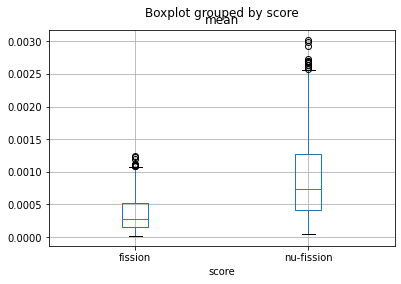

In [5]:
bp = df.boxplot(column='mean', by='score')

In [6]:
df_notnan = df[df['mean'] != 0.]
df_notnan.head(20)

mesh 1       energy low [eV] energy high [eV]       score     mean  \
        x  y  z                                                         
0       1  1  1        0.00e+00         6.25e-01     fission 2.24e-04   
1       1  1  1        0.00e+00         6.25e-01  nu-fission 5.46e-04   
2       1  1  1        6.25e-01         2.00e+07     fission 8.11e-05   
3       1  1  1        6.25e-01         2.00e+07  nu-fission 2.13e-04   
4       2  1  1        0.00e+00         6.25e-01     fission 1.83e-04   
5       2  1  1        0.00e+00         6.25e-01  nu-fission 4.45e-04   
6       2  1  1        6.25e-01         2.00e+07     fission 8.77e-05   
7       2  1  1        6.25e-01         2.00e+07  nu-fission 2.30e-04   
8       3  1  1        0.00e+00         6.25e-01     fission 2.21e-04   
9       3  1  1        0.00e+00         6.25e-01  nu-fission 5.39e-04   
10      3  1  1        6.25e-01         2.00e+07     fission 8.51e-05   
11      3  1  1        6.25e-01         2.00e+07  nu-fission 2.26e-04   
12      4  1  1        0.00e+00         6.25e-01     fission 1.54e-04   
13      4  1  1        0.00e+00         6.25e-01  nu-fission 3.76e-04   
14      4  1  1        6.25e-01         2.00e+07     fission 8.39e-05   
15      4  1  1        6.25e-01         2.00e+07  nu-fission 2.22e-04   
16      5  1  1        0.00e+00         6.25e-01     fission 1.53e-04   
17      5  1  1        0.00e+00         6.25e-01  nu-fission 3.74e-04   
18      5  1  1        6.25e-01         2.00e+07     fission 8.70e-05   
19      5  1  1        6.25e-01         2.00e+07  nu-fission 2.30e-04   

   std. dev.  
              
0   3.27e-05  
1   7.96e-05  
2   5.58e-06  
3   1.40e-05  
4   3.78e-05  
5   9.21e-05  
6   4.25e-06  
7   1.03e-05  
8   3.48e-05  
9   8.48e-05  
10  4.25e-06  
11  1.13e-05  
12  2.87e-05  
13  7.00e-05  
14  5.73e-06  
15  1.44e-05  
16  2.07e-05  
17  5.03e-05  
18  6.51e-06  
19  1.77e-05

Get and plot the nu-fission rate distribution.

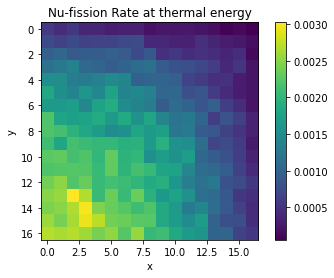

In [12]:
nu_fission_rate = df[df['score'] == 'nu-fission']
nu_fission_rate = nu_fission_rate[nu_fission_rate['energy low [eV]'] == 0.0]
nu_fission_rate = nu_fission_rate['mean'].values.reshape(17, 17)

plt.imshow(nu_fission_rate, interpolation='nearest')
plt.title('Nu-fission Rate at thermal energy')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

##### 2. Nuclides Cell Tally
This tally records the scatter rate for U-235 and U-238.
Notice that there are only 2 rows in the tally data.

In [3]:
tally = sp.get_tally(name='nuclides tally')
print(tally)

Tally
	ID             =	2
	Name           =	nuclides tally
	Filters        =	CellFilter
	Nuclides       =	U235 U238
	Scores         =	['scatter']
	Estimator      =	tracklength


In [4]:
df = tally.get_pandas_dataframe()
df.head(20)

,cell,nuclide,score,mean,std. dev.
0,1,U235,scatter,0.042574,0.000148
1,1,U238,scatter,2.711705,0.008251


##### 3. Distribcell Tally
Analyze the absorption rate and scatter rate for distribcells.

In [5]:
tally = sp.get_tally(name='distribcell tally')
print(tally)

Tally
	ID             =	3
	Name           =	distribcell tally
	Filters        =	DistribcellFilter
	Nuclides       =	total
	Scores         =	['absorption', 'scatter']
	Estimator      =	tracklength


In [6]:
df = tally.get_pandas_dataframe()
df.head()

level 1      level 2       level 3      distribcell nuclide       score  \
     univ cell     lat          univ cell                                   
       id   id      id  x  y      id   id                                   
0       3    4       2  0  0       1    3           0   total  absorption   
1       3    4       2  0  0       1    3           0   total     scatter   
2       3    4       2  1  0       1    3           1   total  absorption   
3       3    4       2  1  0       1    3           1   total     scatter   
4       3    4       2  2  0       1    3           2   total  absorption   

       mean std. dev.  
                       
                       
0  0.000069  0.000008  
1  0.014006  0.000601  
2  0.000058  0.000008  
3  0.014237  0.000404  
4  0.000061  0.000008

Summary statistics for absorption distribcell tally.

In [8]:
absorption = df[df['score'] == 'absorption']
absorption[['mean', 'std. dev.']].dropna().describe()

,mean,std. dev.
,,
,,
count,289.000000,289.000000
mean,0.000194,0.000013
std,0.000108,0.000005
min,0.000012,0.000003
25%,0.000098,0.000009
50%,0.000190,0.000012
75%,0.000277,0.000015
max,0.000411,0.000027


Demonstrate that the absorption rate spatial distribution is identical along y=-x using Mann-Whitney U Test.

In [16]:
index_tag = ('level 2', 'lat')
lower = absorption[absorption[index_tag + ('x', )] + absorption[index_tag + ('y', )] < 16]
upper = absorption[absorption[index_tag + ('x', )] + absorption[index_tag + ('y', )] > 16]

u, p = scipy.stats.mannwhitneyu(lower['mean'], upper['mean'])
print('Since Mann-Whitney U Test value is {:.4f} > 0.05, \none could be accepted that the distribution is identical.'.format(p))

Since Mann-Whitney U Test value is 0.7502 > 0.05, 
one could be accepted that the distribution is identical.


While it is not identical along y=x.

In [17]:
lower = absorption[absorption[index_tag + ('x', )] < absorption[index_tag + ('y', )]]
upper = absorption[absorption[index_tag + ('x', )] > absorption[index_tag + ('y', )]]

u, p = scipy.stats.mannwhitneyu(lower['mean'], upper['mean'])
print('Since Mann-Whitney U Test value is {:.2e} < 0.05, \none could be accepted that the distribution is not identical.'.format(p))

Since Mann-Whitney U Test value is 4.14e-41 < 0.05, 
one could be accepted that the distribution is not identical.


Then plot the relative error & mean value for scatter rate.

/tmp/ipykernel_4287/160138605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter['rel. err.'] = scatter['std. dev.'] / scatter['mean']


<AxesSubplot:title={'center':'Relative Error for Scatter Rate'}, xlabel='mean', ylabel='rel. err.'>

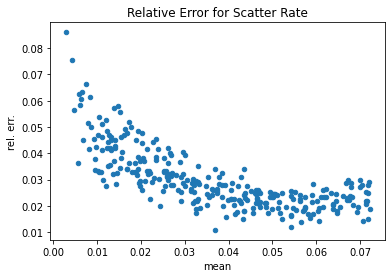

In [20]:
scatter = df[df['score'] == 'scatter']
scatter['rel. err.'] = scatter['std. dev.'] / scatter['mean']
scatter.plot(kind='scatter', x='mean', y='rel. err.', title='Relative Error for Scatter Rate')

Text(0, 0.5, 'Density')

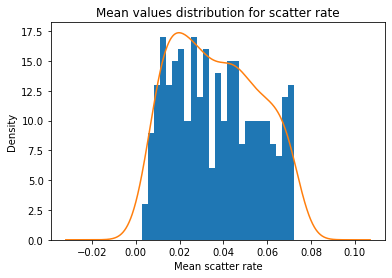

In [21]:
scatter['mean'].plot(kind='hist', bins=25)
scatter['mean'].plot(kind='kde')
plt.title('Mean values distribution for scatter rate')
plt.xlabel('Mean scatter rate')
plt.ylabel('Density')